In [1]:
# Add the parent directory to Python path so Jupyter can find your package
import os
import sys

# Get the absolute path of the notebook's directory
notebook_dir = os.path.abspath('')
# Add parent directory to Python path
parent_dir = os.path.dirname(notebook_dir)
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
    print(f"Added {parent_dir} to Python path")

# Now try importing
import causal_forecast

Added /Users/jamel/Documents/CausalForecasting to Python path


In [8]:
# Create sample time series data
import pandas as pd
import numpy as np
import networkx as nx
import pandas as pd
from causal_forecast import CausalForecaster

# Create causal graph
G = nx.DiGraph()
G.add_edges_from([
    ('temperature', 'humidity'),
    ('temperature', 'rain'),
    ('humidity', 'crop_yield'),
    ('rain', 'crop_yield')
])
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

temperature = np.random.normal(25, 5, len(dates))
humidity = temperature + np.random.normal(60, 10, len(dates))
rain = (temperature < 20) * np.random.binomial(1, 0.3, len(dates))
crop_yield = humidity + rain + np.random.normal(90, 10, len(dates))

data = pd.DataFrame({
    'timestamp': dates,
    'temperature': temperature,
    'humidity': humidity,
    'rain': rain,
    'crop_yield': crop_yield
})

# Initialize forecaster with time component
forecaster = CausalForecaster(
    data=data,
    graph=G,
    target='crop_yield',
    time_column='timestamp',
    forecast_horizon=30,  # Forecast 30 days ahead
    lookback_periods=7    # Use 7 days of history
)

# Train the models
forecaster.fit()

# Make time series predictions
future_predictions = forecaster.predict(steps=30)
print("Future predictions:\n", future_predictions.head())

# Run counterfactual scenario
counterfactual_predictions = forecaster.run_counterfactual(
    interventions={'temperature': 35},
    steps=30
)
print("\nCounterfactual predictions:\n", counterfactual_predictions.head())

Training model for node: temperature
Training model for node: humidity
Training model for node: rain
Training model for node: crop_yield
Future predictions:
    timestamp  temperature   humidity  rain  crop_yield
0 2024-01-01    23.879226  81.474208  0.06  176.794085
1 2024-01-02    25.920575  87.207205  0.01  176.274038
2 2024-01-03    23.919293  83.470568  0.01  176.251366
3 2024-01-04    27.425182  86.548144  0.00  179.350896
4 2024-01-05    23.546400  84.212546  0.00  174.154144

Counterfactual predictions:
    timestamp  temperature   humidity  rain  crop_yield
0 2024-01-01           35  81.474208  0.06  176.794085
1 2024-01-02           35  82.429395  0.13  176.274038
2 2024-01-03           35  83.732054  0.15  176.096347
3 2024-01-04           35  84.070329  0.18  178.928991
4 2024-01-05           35  83.235128  0.15  174.984228


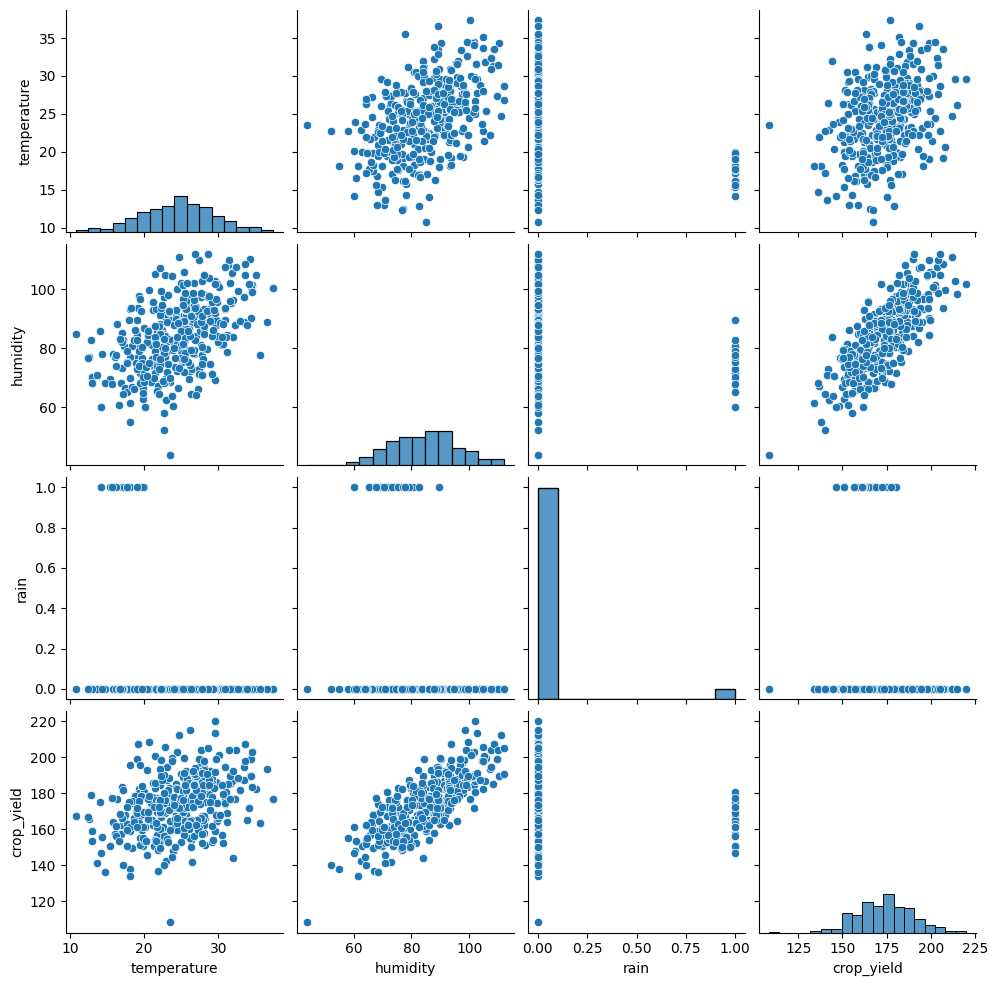

In [9]:

import seaborn as sns
sns.pairplot(data)


/var/folders/jk/5pvh3_7x019cjd3ls0bkbbhh0000gn/T/ipykernel_11581/3535965617.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


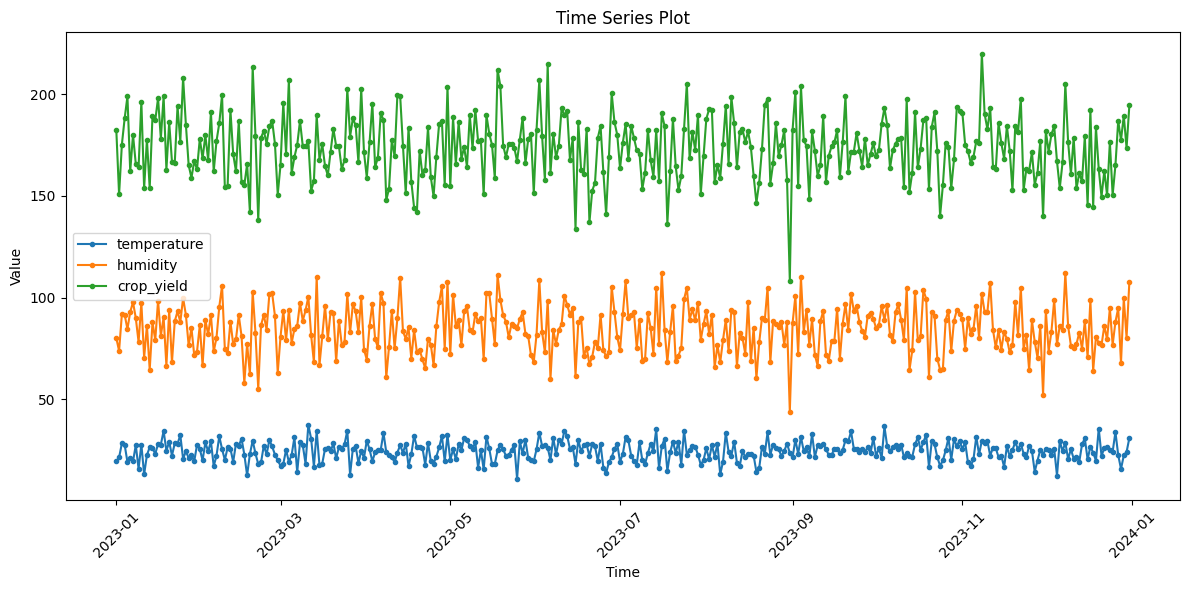

In [10]:
from causal_forecast import (
    plot_time_series,
    plot_forecast_comparison,
    plot_seasonal_decomposition,
    plot_counterfactual_timeseries
)

# Plot original time series
fig = plot_time_series(data, 'timestamp', ['temperature', 'humidity', 'crop_yield'])
fig.show()


/var/folders/jk/5pvh3_7x019cjd3ls0bkbbhh0000gn/T/ipykernel_11581/2329554261.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


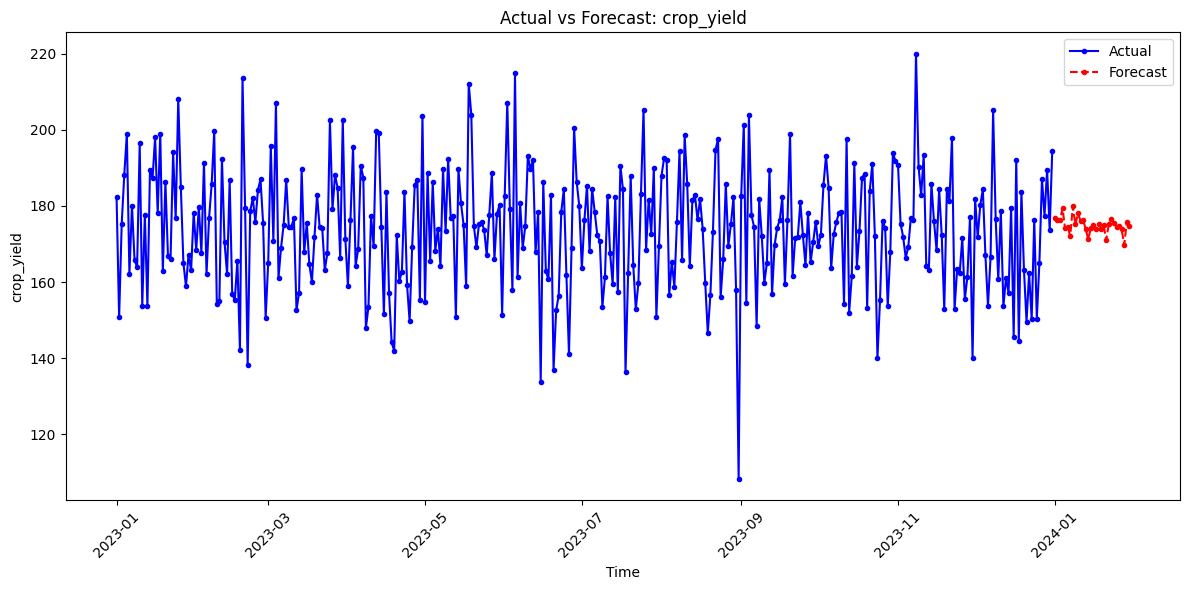

In [11]:

# Compare actual vs forecast
fig = plot_forecast_comparison(data, future_predictions, 'timestamp', 'crop_yield')
fig.show()


/var/folders/jk/5pvh3_7x019cjd3ls0bkbbhh0000gn/T/ipykernel_11581/3477786182.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


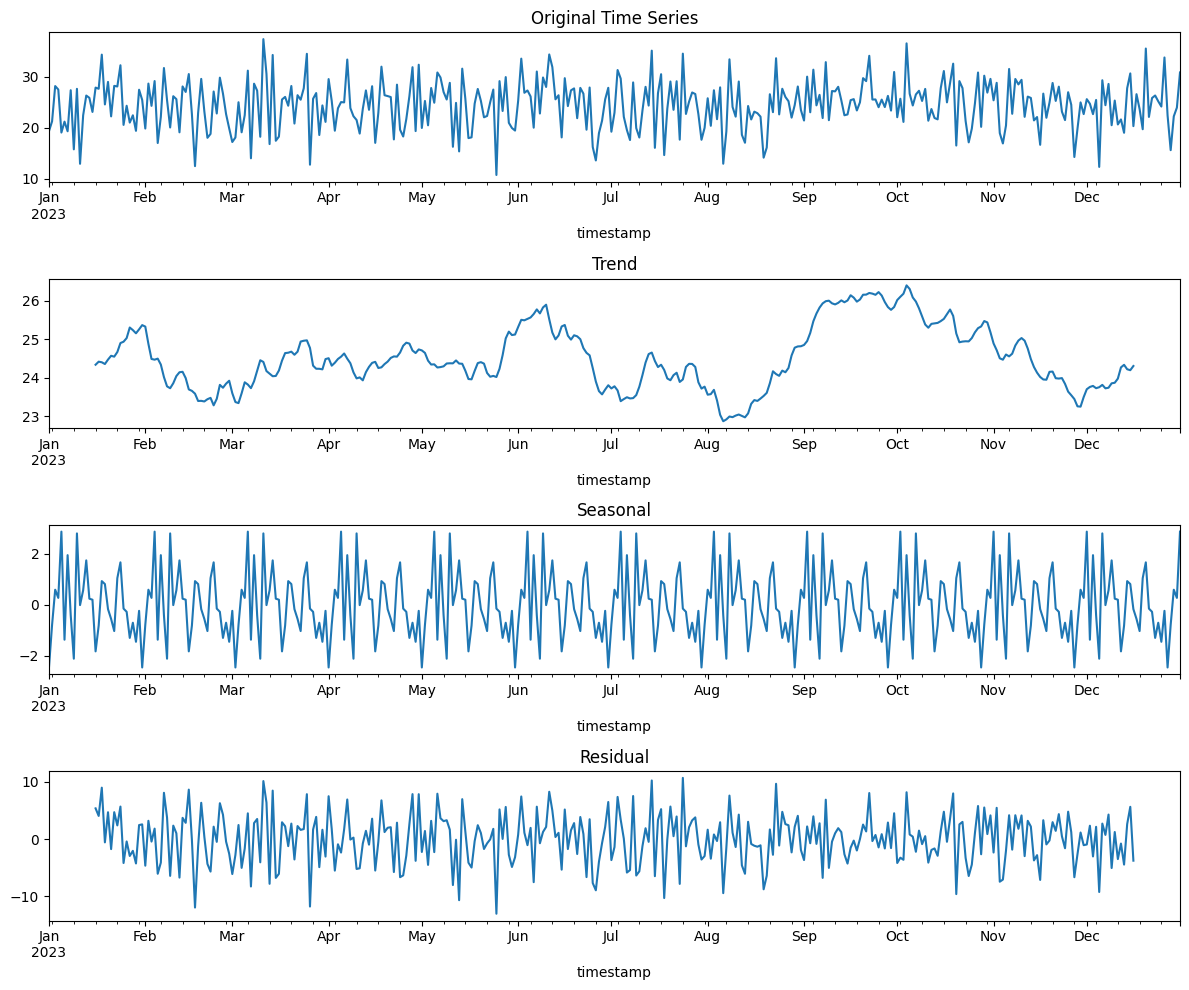

In [12]:

# Plot seasonal decomposition
fig = plot_seasonal_decomposition(data, 'timestamp', 'temperature')
fig.show()


/var/folders/jk/5pvh3_7x019cjd3ls0bkbbhh0000gn/T/ipykernel_11581/2283759860.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


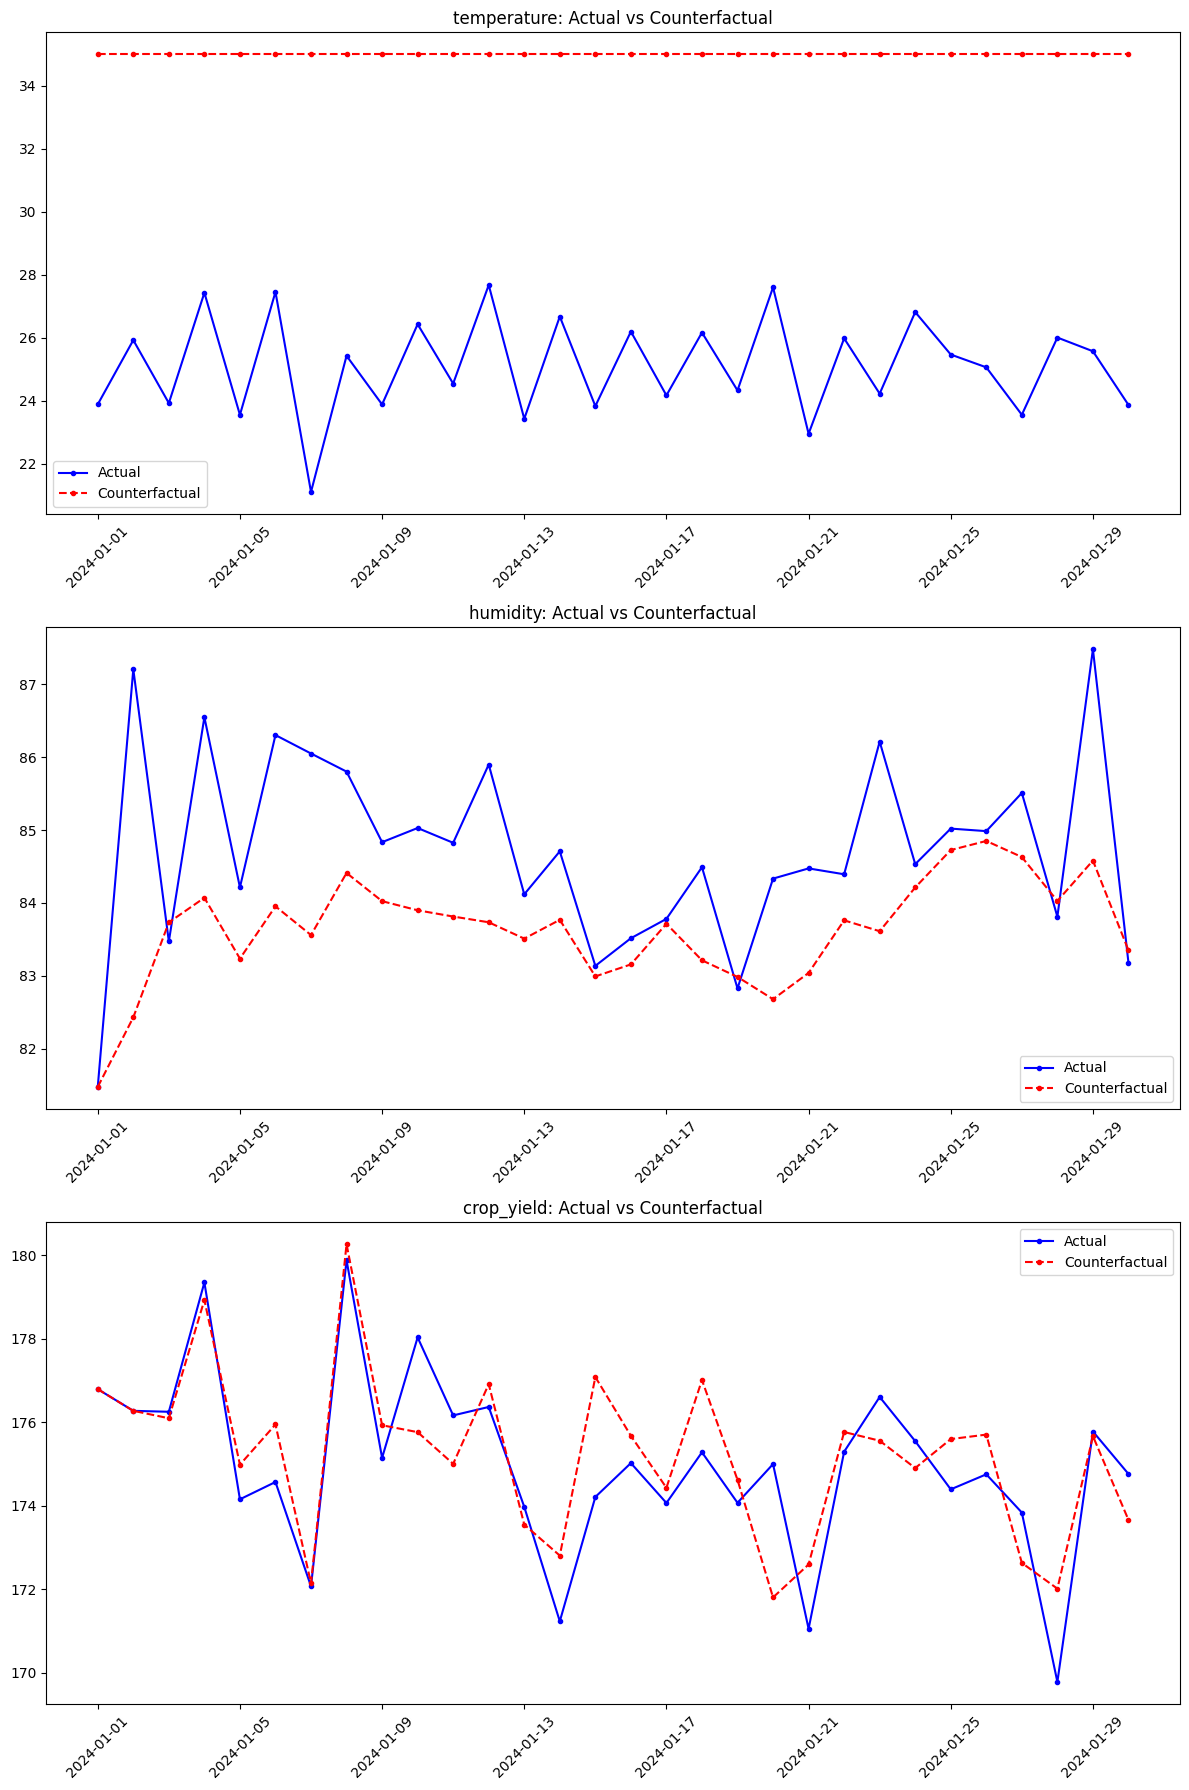

In [13]:

# Compare actual vs counterfactual predictions
fig =  plot_counterfactual_timeseries(
    future_predictions, 
    counterfactual_predictions, 
    'timestamp',
    ['temperature', 'humidity', 'crop_yield']
)
fig.show()